In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
w1 = np.array([(1,6),(3,4),(3,8),(5,6)])
w2 = np.array([(3,0),(1,-2),(3,-4),(5,-2)])

l1=[x[0] for x in w1]
l2=[x[1] for x in w1]

l3=[x[0] for x in w2]
l4=[x[1] for x in w2]

mean1=[sum(l1)/len(l1),sum(l2)/len(l2)]
mean2=[sum(l3)/len(l3),sum(l4)/len(l4)]
mean1=np.array(mean1)
mean2=np.array(mean2)

In [56]:
def covariance(X,mean_1):
    X=X-mean_1
    return (np.dot(X.T,X))/(X.shape[0]-1)
    

In [57]:
def find_case(w1, w2,mean1,mean2):
    cov_w1, cov_w2 = covariance(w1,mean1), covariance(w2,mean2)
    if (cov_w1 == cov_w2).all():
        identity = np.identity(w1.shape[1])
        if ((cov_w1[0, 0] * identity) == cov_w1).all():
            return 1
        else:
            return 2
    else:
        return 3

In [58]:
def discriminant_function(X,mean_1,p,case):
    cov=covariance(X,mean_1)
    inverse=np.linalg.inv(cov)
    det_matrix=np.linalg.det(cov)
    if case==1:
        sigma=cov[0,0]
        A=np.zeros_like(inverse)
        B=mean_1.T/sigma
        C=(-0.5)*np.dot(mean_1.T,mean_1)/sigma+np.log(p)
    elif case==2:
        A=np.zeros_like(inverse)
        B=np.dot(inverse,mean)
        C=(-0.5)*np.dot(np.dot(mean_1.T,inverse),mean_1)+np.log(p)
    elif case==3:
        A=-0.5*inverse
        B=np.dot(inverse,mean_1)
        C=(-0.5)*np.dot(np.dot(mean_1.T,inverse),mean_1)
        C=C-(0.5)*np.log(det_matrix)+np.log(p)
    return lambda x:np.dot(np.dot(x.T,A),x)+np.dot(B.T,x)+C

In [59]:
def discriminant_plot(g1, g2):
    x = np.linspace(-10,10,100)
    y = np.linspace(-10,10,100)
    X,Y = np.meshgrid(x,y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = g1(np.array([X[i,j],Y[i,j]])) - g2(np.array([X[i,j],Y[i,j]]))
    plt.contour(X, Y, Z, levels=[0])
    plt.axis([0, 6, -6, 10])

In [60]:
case=find_case(w1,w2,mean1,mean2)
g1=discriminant_function(w1,mean1,0.5,case)
g2=discriminant_function(w2,mean2,0.5,case)



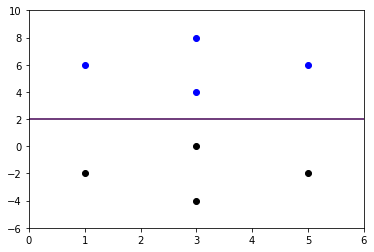

In [61]:
discriminant_plot(g1,g2)
plt.scatter(l1,l2,color='blue')
plt.scatter(l3,l4,color='black')
plt.show()


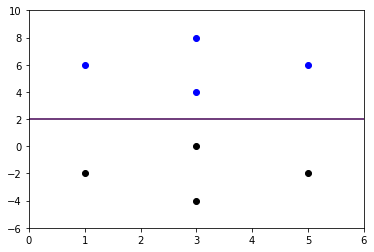

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

w1 = np.array([(1,6),(3,4),(3,8),(5,6)])
w2 = np.array([(3,0),(1,-2),(3,-4),(5,-2)])

l1=[x[0] for x in w1]
l2=[x[1] for x in w1]

l3=[x[0] for x in w2]
l4=[x[1] for x in w2]

mean1=[sum(l1)/len(l1),sum(l2)/len(l2)]
mean2=[sum(l3)/len(l3),sum(l4)/len(l4)]
mean1=np.array(mean1)
mean2=np.array(mean2)


def covariance(X,mean_1):
    X=X-mean_1
    return (np.dot(X.T,X))/(X.shape[0]-1)
    
    
def find_case(w1, w2,mean1,mean2):
    cov_w1, cov_w2 = covariance(w1,mean1), covariance(w2,mean2)
    if (cov_w1 == cov_w2).all():
        identity = np.identity(w1.shape[1])
        if ((cov_w1[0, 0] * identity) == cov_w1).all():
            return 1
        else:
            return 2
    else:
        return 3


def discriminant_function(X,mean_1,p,case):
    cov=covariance(X,mean_1)
    inverse=np.linalg.inv(cov)
    det_matrix=np.linalg.det(cov)
    if case==1:
        sigma=cov[0,0]
        A=np.zeros_like(inverse)
        B=mean_1.T/sigma
        C=(-0.5)*np.dot(mean_1.T,mean_1)/sigma+np.log(p)
    elif case==2:
        A=np.zeros_like(inverse)
        B=np.dot(inverse,mean_1)
        C=(-0.5)*np.dot(np.dot(mean_1.T,inverse),mean_1)+np.log(p)
    elif case==3:
        A=-0.5*inverse
        B=np.dot(inverse,mean_1)
        C=(-0.5)*np.dot(np.dot(mean_1.T,inverse),mean_1)
        C=C-(0.5)*np.log(det_matrix)+np.log(p)
    return lambda x:np.dot(np.dot(x.T,A),x)+np.dot(B.T,x)+C
    

def discriminant_plot(g1, g2):
    x = np.linspace(-10,10,100)
    y = np.linspace(-10,10,100)
    X,Y = np.meshgrid(x,y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = g1(np.array([X[i,j],Y[i,j]])) - g2(np.array([X[i,j],Y[i,j]]))
    plt.contour(X, Y, Z, levels=[0])
    plt.axis([0, 6, -6, 10])
    

case=find_case(w1,w2,mean1,mean2)
g1=discriminant_function(w1,mean1,0.5,case)
g2=discriminant_function(w2,mean2,0.5,case)


discriminant_plot(g1,g2)
plt.scatter(l1,l2,color='blue')
plt.scatter(l3,l4,color='black')
plt.show()

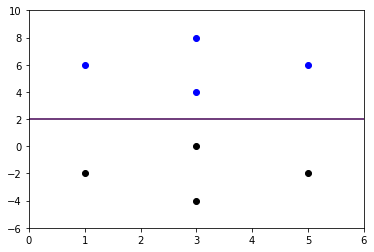

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

w1 = np.array([(1,6),(3,4),(3,8),(5,6)])
w2 = np.array([(3,0),(1,-2),(3,-4),(5,-2)])

l1=[x[0] for x in w1]
l2=[x[1] for x in w1]

l3=[x[0] for x in w2]
l4=[x[1] for x in w2]

mean1=[sum(l1)/len(l1),sum(l2)/len(l2)]
mean2=[sum(l3)/len(l3),sum(l4)/len(l4)]
mean1=np.array(mean1)
mean2=np.array(mean2)


def covariance(X,mean_1):
    X=X-mean_1
    return (np.dot(X.T,X))/(X.shape[0]-1)
    
    
def find_case(w1, w2,mean1,mean2):
    cov_w1, cov_w2 = covariance(w1,mean1), covariance(w2,mean2)
    if (cov_w1 == cov_w2).all():
        identity = np.identity(w1.shape[1])
        if ((cov_w1[0, 0] * identity) == cov_w1).all():
            return 1
        else:
            return 2
    else:
        return 3


def discriminant_function(X,mean_1,p,case):
    cov=covariance(X,mean_1)
    inverse=np.linalg.inv(cov)
    det_matrix=np.linalg.det(cov)
    if case==1:
        sigma=cov[0,0]
        A=np.zeros_like(inverse)
        B=mean_1.T/sigma
        C=(-0.5)*np.dot(mean_1.T,mean_1)/sigma+np.log(p)
    elif case==2:
        A=np.zeros_like(inverse)
        B=np.dot(inverse,mean_1)
        C=(-0.5)*np.dot(np.dot(mean_1.T,inverse),mean_1)+np.log(p)
    elif case==3:
        A=-0.5*inverse
        B=np.dot(inverse,mean_1)
        C=(-0.5)*np.dot(np.dot(mean_1.T,inverse),mean_1)
        C=C-(0.5)*np.log(det_matrix)+np.log(p)
    return lambda x:np.dot(np.dot(x.T,A),x)+np.dot(B.T,x)+C
    

def discriminant_plot(g1, g2):
    x = np.linspace(-10,10,100)
    y = np.linspace(-10,10,100)
    X,Y = np.meshgrid(x,y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = g1(np.array([X[i,j],Y[i,j]])) - g2(np.array([X[i,j],Y[i,j]]))
    plt.contour(X, Y, Z, levels=[0])
    plt.axis([0, 6, -6, 10])
    

case=find_case(w1,w2,mean1,mean2)
g1=discriminant_function(w1,mean1,0.5,case)
g2=discriminant_function(w2,mean2,0.5,case)


discriminant_plot(g1,g2)
plt.scatter(l1,l2,color='blue')
plt.scatter(l3,l4,color='black')
plt.show()